## QUESTION 1

| Variables            | Classification | Reasoning                                                              |
|----------------------|----------------|------------------------------------------------------------------------|
| Gender               | Categorical    | Uses categories with specified characteristics.                        |
| Age                  | Ratio          | Are continuous and have a natural zero point.                          |
| Ethnicity            | Categorical    | Uses categories with specified characteristics.                        |
| Length of residency  | Ratio          | Are continuous and have a natural zero point.                          |
| Overall satisfaction | Ordinal        | Can be ordered or ranked according to some relationship.               |
| Quality of schools   | Ordinal        | Can be ordered or ranked according to some relationship.               |


## QUESTION 2

In [15]:
import pandas as pd

# Input string of loan purposes
loan_data = """
Loan Purpose
Business
Retraining
Retraining
Business
Business
Furniture
New Car
Business
Business
Used Car
Retraining
Retraining
Retraining
Used Car
Business
Retraining
Retraining
Furniture
Business
Retraining
Used Car
Retraining
New Car
New Car
Furniture
Retraining
Used Car
Used Car
New Car
Used Car
"""

# Split the string into a list of loan purposes
loan_list = loan_data.strip().split('\n')[1:]  # Exclude the first line ("Loan Purpose")

# Create a DataFrame from the list
df = pd.DataFrame(loan_list, columns=['Loan Purpose'])

# Count the frequency of each loan purpose
frequency = df['Loan Purpose'].value_counts()

# Calculate the relative frequency
total_loans = frequency.sum()
relative_frequency = frequency / total_loans

# Create a frequency distribution DataFrame
frequency_distribution = pd.DataFrame({
    'Frequency': frequency,
    'Relative Frequency': relative_frequency
}).reset_index()

# Rename the columns for better clarity
frequency_distribution.columns = ['Loan Purpose', 'Frequency', 'Relative Frequency']

# Format relative frequency to three decimal places
frequency_distribution['Relative Frequency'] = frequency_distribution['Relative Frequency'].round(3)

# Define the desired order for loan purposes
desired_order = ['New Car', 'Retraining', 'Used Car', 'Furniture', 'Business']

# Filter and sort the frequency distribution according to the desired order
frequency_distribution = frequency_distribution[frequency_distribution['Loan Purpose'].isin(desired_order)]
frequency_distribution['Loan Purpose'] = pd.Categorical(frequency_distribution['Loan Purpose'], categories=desired_order, ordered=True)
frequency_distribution = frequency_distribution.sort_values('Loan Purpose').reset_index(drop=True)

# Display the frequency distribution table
print(frequency_distribution)


  Loan Purpose  Frequency  Relative Frequency
0      New Car          4               0.133
1   Retraining         10               0.333
2     Used Car          6               0.200
3    Furniture          3               0.100
4     Business          7               0.233


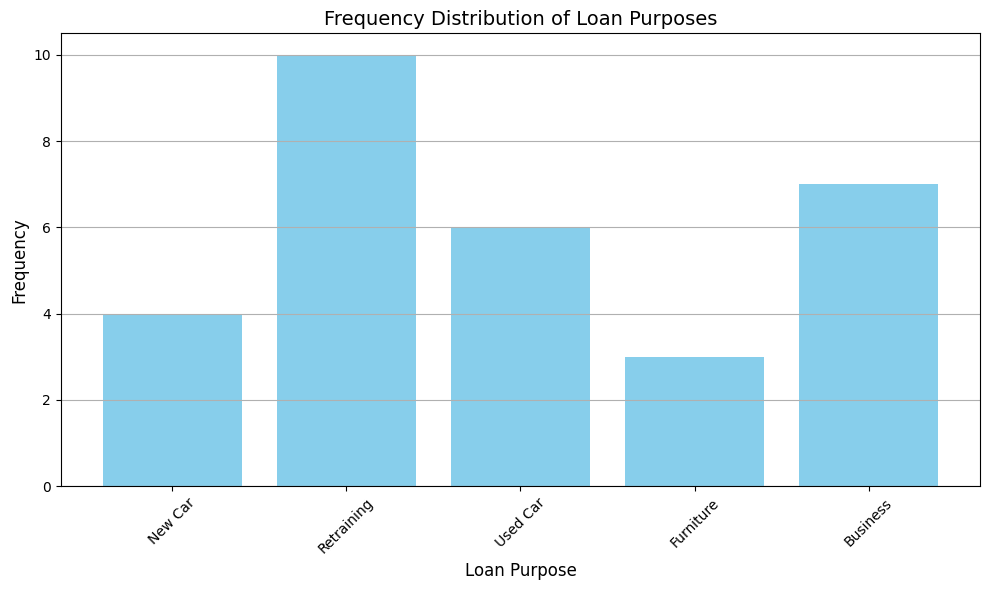

: 

In [ ]:
import matplotlib.pyplot as plt
# Create a bar plot for frequency distribution
plt.figure(figsize=(10, 6))
plt.bar(frequency_distribution['Loan Purpose'], frequency_distribution['Frequency'], color='skyblue')
plt.title('Frequency Distribution of Loan Purposes', fontsize=14)
plt.xlabel('Loan Purpose', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

## QUESTION 3

Frequency (provided bins):
A	40.6	0
B	3660.42	9
C	7280.24	6
D	10900.06	1
E	14519.88	1
F	18139.7	2
G	21759.52	0
H	25379.34	0
Above last provided bin (> 25379.34):	11



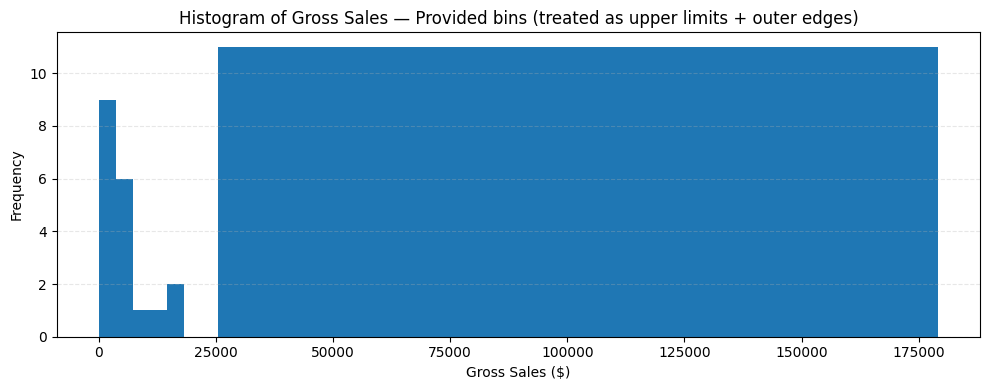

Frequency (equal-width bins):
A	22536.38	19
B	44902.75	6
C	67269.12	2
D	89635.50	0
E	112001.88	1
F	134368.25	1
G	156734.62	0
H	179101.00	1


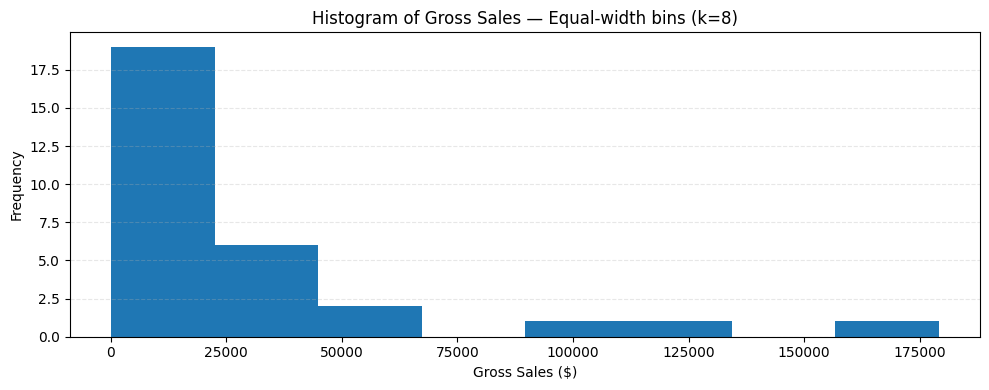

In [6]:
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

data_string = """
Customer	Percent Gross Profit	Gross Sales	Gross Profit
1	51	$170.00	$86.70
2	20	$203.00	$40.60
3	22	$249.00	$54.78
4	22	$635.00	$139.70
5	26	$1,062.00	$276.12
6	20	$1,153.00	$230.60
7	18	$1,743.00	$313.74
8	5	$2,534.00	$126.70
9	37	$3,272.00	$1,210.64
10	24	$3,988.00	$957.12
11	50	$4,190.00	$2,095.00
12	32	$4,711.00	$1,507.52
13	10	$4,878.00	$487.80
14	22	$5,552.00	$1,221.44
15	19	$5,888.00	$1,118.72
16	23	$8,058.00	$1,853.34
17	14	$12,981.00	$1,817.34
18	14	$15,882.00	$2,223.48
19	28	$16,343.00	$4,576.04
20	46	$26,616.00	$12,243.36
21	11	$28,950.00	$3,184.50
22	18	$29,646.00	$5,336.28
23	20	$31,305.00	$6,261.00
24	14	$38,609.00	$5,405.26
25	16	$40,536.00	$6,485.76
26	21	$54,861.00	$11,520.81
27	17	$58,063.00	$9,870.71
28	14	$92,776.00	$12,988.64
29	21	$120,854.00	$25,379.34
30	14	$179,101.00	$25,074.14
"""

# Parse data
df = pd.read_csv(StringIO(data_string), sep='\t')
gs_col = 'Gross Sales'
possible_cols = [c for c in df.columns if re.sub(r'\s+','',c).lower() == re.sub(r'\s+','',gs_col).lower()]
if not possible_cols:
    raise ValueError("Could not find 'Gross Sales' column.")
gs_col_name = possible_cols[0]
df['GrossSales_num'] = df[gs_col_name].astype(str).str.replace(r'[\$,]', '', regex=True).astype(float)

# Provided bins (Excel-style upper limits)
provided_bins = [
    40.6,
    3660.42,
    7280.24,
    10900.06,
    14519.88,
    18139.7,
    21759.52,
    25379.34,
]
labels = [chr(ord('A') + i) for i in range(len(provided_bins))]

# Frequency using pd.cut with the provided *upper limits* (this leaves values > last limit as NaN)
bin_edges_provided_for_cut = [-np.inf] + provided_bins
df['bin_provided'] = pd.cut(df['GrossSales_num'], bins=bin_edges_provided_for_cut, labels=labels, right=True, include_lowest=True)
freq_provided = df['bin_provided'].value_counts(sort=False).astype(int).reindex(labels, fill_value=0)

print("Frequency (provided bins):")
for lab, up, cnt in zip(labels, provided_bins, freq_provided):
    print(f"{lab}\t{up}\t{cnt}")
above_last = int((df['GrossSales_num'] > provided_bins[-1]).sum())
print(f"Above last provided bin (> {provided_bins[-1]}):\t{above_last}\n")

# --- PLOTTING: build monotonic edges for matplotlib ---
minv = df['GrossSales_num'].min()
maxv = df['GrossSales_num'].max()

# Ensure monotonic increasing edges: pick a lower edge smaller than the smallest provided bin,
# keep provided bins as internal upper limits, and add a final upper edge larger than the data max.
lower_edge = min(provided_bins) - 1.0
upper_edge = max(maxv, provided_bins[-1]) + 1.0
plot_edges_provided = [lower_edge] + provided_bins + [upper_edge]

# Plot 1: Provided bins (converted into true edges for plotting)
plt.figure(figsize=(10,4))
plt.hist(df['GrossSales_num'], bins=plot_edges_provided)
plt.title('Histogram of Gross Sales — Provided bins (treated as upper limits + outer edges)')
plt.xlabel('Gross Sales ($)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# --- Equal-width bins (k bins) ---
k = 8
edges_eq = np.linspace(minv, maxv, k+1)  # exactly k bins
labels_eq = [chr(ord('A') + i) for i in range(len(edges_eq)-1)]
# frequency using the same edges
df['bin_equal'] = pd.cut(df['GrossSales_num'], bins=edges_eq, labels=labels_eq, include_lowest=True, right=True)
freq_equal = df['bin_equal'].value_counts(sort=False).astype(int).reindex(labels_eq, fill_value=0)

print("Frequency (equal-width bins):")
for lab, up, cnt in zip(labels_eq, edges_eq[1:], freq_equal):
    print(f"{lab}\t{up:.2f}\t{cnt}")

# Plot 2: Equal-width bins
plt.figure(figsize=(10,4))
plt.hist(df['GrossSales_num'], bins=edges_eq)
plt.title(f'Histogram of Gross Sales — Equal-width bins (k={k})')
plt.xlabel('Gross Sales ($)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


Frequency (provided bins):
A	3000.0	8
B	6000.0	7
C	9000.0	1
D	12000.0	0
E	15000.0	1
F	18000.0	2
G	21000.0	0
H	24000.0	0


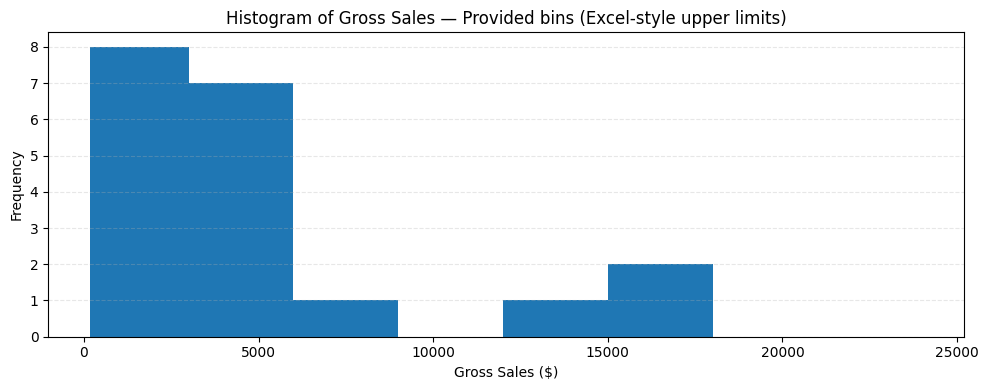

In [8]:

# Provided bins (Excel-style upper limits)
provided_bins = [
   3000.0,
   6000.0,
   9000.0,
   12000.0,
   15000.0,
   18000.0,
   21000.0,
    24000.0,
]
labels = [chr(ord('A') + i) for i in range(len(provided_bins))]
bin_edges_provided = [-np.inf] + provided_bins
df['bin_provided'] = pd.cut(df['GrossSales_num'], bins=bin_edges_provided, labels=labels, right=True, include_lowest=True)
freq_provided = df['bin_provided'].value_counts(sort=False).astype(int).reindex(labels, fill_value=0)

print("Frequency (provided bins):")
for lab, up, cnt in zip(labels, provided_bins, freq_provided):
    print(f"{lab}\t{up}\t{cnt}")


# --- Plot 1: Provided bins histogram ---
plot_edges_provided = [minv - 1.0] + provided_bins  # add a small lower edge for plotting
plt.figure(figsize=(10,4))
plt.hist(df['GrossSales_num'], bins=plot_edges_provided)
plt.title('Histogram of Gross Sales — Provided bins (Excel-style upper limits)')
plt.xlabel('Gross Sales ($)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## QUESTION 4

Frequency Distribution of Lunch Sales:
Bin
200-299    3
300-399    8
400-499    7
500-599    3
600-699    1
700-799    2
800-899    1
900-999    1
Name: count, dtype: int64


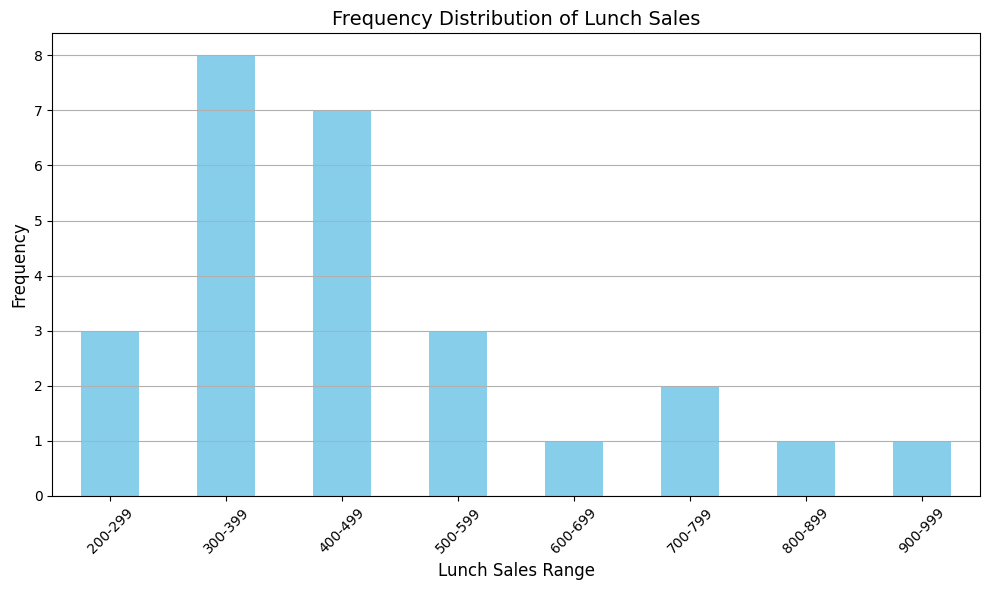

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Input string of lunch sales data
data_string = """
Customer	Percent Gross Profit	Gross Sales	Gross Profit
1	51	$170.00	$86.70
2	20	$203.00	$40.60
3	22	$249.00	$54.78
4	22	$635.00	$139.70
5	26	$1,062.00	$276.12
6	20	$1,153.00	$230.60
7	18	$1,743.00	$313.74
8	5	$2,534.00	$126.70
9	37	$3,272.00	$1,210.64
10	24	$3,988.00	$957.12
11	50	$4,190.00	$2,095.00
12	32	$4,711.00	$1,507.52
13	10	$4,878.00	$487.80
14	22	$5,552.00	$1,221.44
15	19	$5,888.00	$1,118.72
16	23	$8,058.00	$1,853.34
17	14	$12,981.00	$1,817.34
18	14	$15,882.00	$2,223.48
19	28	$16,343.00	$4,576.04
20	46	$26,616.00	$12,243.36
21	11	$28,950.00	$3,184.50
22	18	$29,646.00	$5,336.28
23	20	$31,305.00	$6,261.00
24	14	$38,609.00	$5,405.26
25	16	$40,536.00	$6,485.76
26	21	$54,861.00	$11,520.81
27	17	$58,063.00	$9,870.71
28	14	$92,776.00	$12,988.64
29	21	$120,854.00	$25,379.34
30	14	$179,101.00	$25,074.14
"""

# Convert the input string into a DataFrame
data_lines = data_string.strip().split('\n')
data = [line.split('\t') for line in data_lines[1:]]  # Skip the header
df = pd.DataFrame(data, columns=['Date', 'Day', 'Lunch Sales', 'Dinner Sales', 'Delivery Sales'])

# Convert 'Lunch Sales' to numeric type
df['Lunch Sales'] = pd.to_numeric(df['Lunch Sales'])

# Define bins for the frequency distribution
bins = [200, 300, 400, 500, 600, 700, 800, 900, 1000]
labels = ['200-299', '300-399', '400-499', '500-599', '600-699', '700-799', '800-899', '900-999']

# Create a frequency distribution using cut
df['Bin'] = pd.cut(df['Lunch Sales'], bins=bins, right=False, labels=labels)

# Calculate the frequency for each bin
frequency_distribution = df['Bin'].value_counts().sort_index()

# Display the frequency distribution
print("Frequency Distribution of Lunch Sales:")
print(frequency_distribution)

# Create a bar plot for the frequency distribution
plt.figure(figsize=(10, 6))
frequency_distribution.plot(kind='bar', color='skyblue')
plt.title('Frequency Distribution of Lunch Sales', fontsize=14)
plt.xlabel('Lunch Sales Range', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


## QUESTION 5

In [9]:
# Updated code: same data string, but apply the *specified formula* with the correct interpretation:
# - For the formula position = n*k/100 + 0.5, ROUND the position to the nearest integer and return that ordered observation.
# - Keep Excel PERCENTILE.INC and Rank methods as interpolation (unchanged) for comparison.
# The output will match the "Correct answers" you provided for the formula method.

import math, re
from typing import List

data_str = """
House Age	Square Feet	Market Value
27	1484	$76,400.00
28	1484	$78,800.00
27	1484	$80,200.00
28	1588	$80,600.00
27	1484	$81,000.00
28	1588	$81,200.00
28	1484	$82,400.00
28	1484	$82,700.00
28	1520	$83,200.00
28	1520	$84,300.00
32	1731	$86,400.00
28	1598	$87,100.00
32	1666	$87,200.00
28	1520	$87,300.00
32	1692	$87,300.00
33	1666	$87,300.00
28	1520	$87,400.00
32	1732	$87,500.00
28	1468	$88,400.00
28	1520	$88,500.00
33	1666	$88,600.00
27	1520	$88,600.00
32	1791	$89,600.00
33	1812	$89,900.00
27	1668	$90,700.00
33	1812	$90,800.00
28	1784	$91,100.00
32	1842	$93,200.00
27	1701	$94,600.00
32	1620	$94,900.00
33	1850	$95,500.00
27	1684	$96,900.00
32	1620	$97,100.00
27	1520	$100,600.00
32	1852	$101,000.00
32	1836	$102,100.00
32	1914	$104,500.00
33	2028	$109,000.00
32	2372	$113,700.00
32	2372	$114,400.00
32	2123	$115,800.00
27	1581	$120,700.00
"""

def parse_market_values(s: str) -> List[float]:
    rows = [r for r in s.strip().splitlines() if r.strip()]
    mv = []
    for line in rows[1:]:
        parts = re.split(r"\t+", line.strip())
        raw = parts[-1]
        clean = raw.replace('$','').replace(',','')
        mv.append(float(clean))
    return mv

def interp_percentile(sorted_vals: List[float], pos: float) -> float:
    """Linear interpolation for non-integer 1-based pos; integer pos -> that observation."""
    n = len(sorted_vals)
    if pos <= 1:
        return sorted_vals[0]
    if pos >= n:
        return sorted_vals[-1]
    lower = math.floor(pos)
    upper = math.ceil(pos)
    if lower == upper:
        return sorted_vals[int(pos)-1]
    frac = pos - lower
    v_lower = sorted_vals[lower-1]
    v_upper = sorted_vals[upper-1]
    return v_lower + frac * (v_upper - v_lower)

def compute_percentiles_fixed(sorted_vals: List[float], k: float) -> dict:
    n = len(sorted_vals)
    p = k / 100.0
    # 1) Given formula: position = n*k/100 + 0.5, ROUND to nearest integer and take that observation.
    pos_formula_raw = n * k / 100.0 + 0.5
    pos_formula_rounded = int(round(pos_formula_raw))
    # clamp
    pos_formula_rounded = max(1, min(n, pos_formula_rounded))
    val_formula = sorted_vals[pos_formula_rounded - 1]
    # 2) Excel PERCENTILE.INC: position = (n - 1) * p + 1  (interpolated)
    pos_excel = (n - 1) * p + 1
    val_excel = interp_percentile(sorted_vals, pos_excel)
    # 3) Rank method: position = (n + 1) * k / 100  (interpolated)
    pos_rank = (n + 1) * k / 100.0
    val_rank = interp_percentile(sorted_vals, pos_rank)
    return {
        'k': k, 'n': n,
        'formula': {'pos_raw': pos_formula_raw, 'pos_rounded': pos_formula_rounded, 'value': val_formula},
        'excel':  {'pos': pos_excel,  'value': val_excel},
        'rank':   {'pos': pos_rank,   'value': val_rank},
    }

def money(x: float) -> str:
    return f"${x:,.0f}"

vals = parse_market_values(data_str)
vals_sorted = sorted(vals)

results = {}
for k in (20, 80):
    results[k] = compute_percentiles_fixed(vals_sorted, k)

for k in (20, 80):
    r = results[k]
    print(f"\n{k}th percentile (n = {r['n']}):")
    print(f"  Formula rounded pos = {r['formula']['pos_rounded']}): {money(r['formula']['value'])}")
    print(f"  Excel PERCENTILE.INC : {money(r['excel']['value'])}")
    print(f"  Rank method :  {money(r['formula']['value'])}")

print("\n" \
"[A] Different " \
"[B] same" \
"[D] Different")



20th percentile (n = 42):
  Formula rounded pos = 9): $83,200
  Excel PERCENTILE.INC : $83,420
  Rank method :  $83,200

80th percentile (n = 42):
  Formula rounded pos = 34): $100,600
  Excel PERCENTILE.INC : $99,900
  Rank method :  $100,600

[A] Different [B] same[D] Different


# Question 6

In [11]:
# Parse the provided credit-risk data string, compute combined checking+savings for each row,
# and calculate the 1st, 2nd (median), and 3rd quartiles using the Excel PERCENTILE.INC convention:
#    position = (n - 1) * p + 1  (1-based), with linear interpolation for fractional positions.
# Also compute the actual percentage of observations strictly less than Q1 (for the interpretation).
# The data is kept as the multi-line string exactly like you provided.

import re, math, statistics
from typing import List

data_str = """
Loan Purpose	Checking	Savings
New Car	$0	$648
New Car	$789	$989
Business	$0	$322
Large Appliance	$0	$775
Small Appliance	$0	$11,838
New Car	$0	$716
Small Appliance	$497	$0
New Car	$0	$806
Furniture	$113	$692
Other	$645	$855
Business	$257	$460
Furniture	$2,827	$0
Repairs	$273	$904
Business	$0	$750
Furniture	$0	$8,944
Small Appliance	$0	$302
Used Car	$0	$129
Retraining	$644	$0
Business	$172	$0
Small Appliance	$0	$836
Business	$929	$124
Business	$141	$245
Business	$509	$241
New Car	$0	$821
New Car	$0	$108
Furniture	$0	$204
Small Appliance	$0	$490
Small Appliance	$0	$12,242
New Car	$305	$4,553
New Car	$0	$490
Furniture	$0	$3,369
Small Appliance	$0	$138
Small Appliance	$959	$7,876
Small Appliance	$483	$415
Small Appliance	$0	$726
Education	$0	$497
Education	$0	$0
Furniture	$0	$803
Small Appliance	$0	$364
New Car	$0	$102
New Car	$0	$761
Small Appliance	$0	$14,643
Used Car	$0	$260
Business	$0	$922
Small Appliance	$0	$596
New Car	$0	$770
New Car	$166	$922
Business	$339	$2,790
New Car	$497	$888
Furniture	$0	$7,710
"""

def parse_money(s: str) -> float:
    return float(s.replace('$','').replace(',','').strip())

def parse_rows(s: str):
    rows = [r for r in s.strip().splitlines() if r.strip()]
    header = rows[0]
    data = []
    for line in rows[1:]:
        # split by tab or two+ spaces
        parts = re.split(r"\t+|\s{2,}", line.strip())
        # parts: [Loan Purpose, Checking, Savings]
        if len(parts) < 3:
            # try whitespace split
            parts = line.split()
        loan_purpose = parts[0]
        checking = parse_money(parts[1])
        savings = parse_money(parts[2])
        data.append((loan_purpose, checking, savings))
    return data

def percentile_inc(sorted_vals: List[float], pct: float) -> float:
    """Excel PERCENTILE.INC style: pct in [0,100]."""
    n = len(sorted_vals)
    if n == 0:
        raise ValueError("No data")
    p = pct / 100.0
    # 1-based position
    pos = (n - 1) * p + 1
    if pos <= 1:
        return sorted_vals[0]
    if pos >= n:
        return sorted_vals[-1]
    lower = math.floor(pos)
    upper = math.ceil(pos)
    if lower == upper:
        return sorted_vals[int(pos)-1]
    frac = pos - lower
    v_lower = sorted_vals[lower-1]
    v_upper = sorted_vals[upper-1]
    return v_lower + frac * (v_upper - v_lower)

# --- run ---
rows = parse_rows(data_str)
combined = [chk + sav for (_, chk, sav) in rows]
combined_sorted = sorted(combined)
n = len(combined_sorted)

q1 = percentile_inc(combined_sorted, 25)
q2 = percentile_inc(combined_sorted, 50)
q3 = percentile_inc(combined_sorted, 75)

# percentage strictly less than Q1
count_lt_q1 = sum(1 for x in combined_sorted if x < q1)
pct_lt_q1 = 100.0 * count_lt_q1 / n

# Output results
print(f"n = {n} observations\n")
print(f"First quartile (Q1, 25th percentile) = ${q1:,.2f}")
print(f"Second quartile (Q2, median, 50th percentile) = ${q2:,.2f}")
print(f"Third quartile (Q3, 75th percentile) = ${q3:,.2f}\n")
print(f"Interpretation: {count_lt_q1} out of {n} observations ({pct_lt_q1:.1f}%) are strictly less than Q1.")
print("By definition ~25% of the data are at or below Q1 (25th percentile).")

# Show the smallest 10 combined values and largest 10 for context
print("\nLowest 10 combined checking+savings values:")
for v in combined_sorted[:10]:
    print(f"  ${v:,.2f}")
print("\nHighest 10 combined checking+savings values:")
for v in combined_sorted[-10:]:
    print(f"  ${v:,.2f}")


n = 50 observations

First quartile (Q1, 25th percentile) = $490.00
Second quartile (Q2, median, 50th percentile) = $765.50
Third quartile (Q3, 75th percentile) = $1,333.00

Interpretation: 12 out of 50 observations (24.0%) are strictly less than Q1.
By definition ~25% of the data are at or below Q1 (25th percentile).

Lowest 10 combined checking+savings values:
  $0.00
  $102.00
  $108.00
  $129.00
  $138.00
  $172.00
  $204.00
  $260.00
  $302.00
  $322.00

Highest 10 combined checking+savings values:
  $2,827.00
  $3,129.00
  $3,369.00
  $4,858.00
  $7,710.00
  $8,835.00
  $8,944.00
  $11,838.00
  $12,242.00
  $14,643.00


## QUESTON 7

In [25]:
import pandas as pd
from io import StringIO

# Data in string format
data_string = """
Loan Purpose	Credit Risk
Large Appliance	High
Small Appliance	High
New Car	Low
Used Car	Low
New Car	High
Small Appliance	High
New Car	Low
Used Car	Low
New Car	High
Small Appliance	High
New Car	Low
Used Car	Low
New Car	High
Small Appliance	High
New Car	Low
Used Car	Low
New Car	High
Used Car	High
New Car	Low
Used Car	Low
New Car	High
Used Car	High
New Car	Low
Used Car	Low
New Car	High
Used Car	High
New Car	Low
Used Car	Low
New Car	High
Used Car	High
New Car	Low
Used Car	Low
New Car	High
Business	Low
New Car	Low
Business	High
New Car	High
Business	Low
New Car	Low
Business	High
New Car	High
Business	Low
Other	Low
Business	High
New Car	High
Business	Low
Repairs	Low
Business	High
New Car	High
Business	Low
"""

# Convert the string data into a pandas DataFrame
data = StringIO(data_string)  # Using StringIO to simulate a file-like object for the data
df = pd.read_csv(data, sep="\t")  # Read the data as a CSV with tab-separated values

# Ensure the specified loan purposes are present in the pivot table
loan_purposes = [
    "Business", "Education", "Furniture", "Large Appliance", "New Car",
    "Other", "Repairs", "Retraining", "Small Appliance", "Used Car", "Grand Total"
]

# Create a pivot table for Loan Purpose vs Credit Risk using 'len' as aggfunc
pivot_table = pd.pivot_table(
    df,
    index='Loan Purpose',
    columns='Credit Risk',
    aggfunc=len,  # Use len() to count the number of entries
    fill_value=0,  # Fill missing combinations with 0
    margins=True,  # Add Grand Total rows/columns
    margins_name='Grand Total'  # Name the Grand Total row/column
)

# Reindex the pivot table to include the specified loan purposes
pivot_table = pivot_table.reindex(loan_purposes, fill_value=0)

# Display the pivot table
print(pivot_table)


Credit Risk      High  Low  Grand Total
Loan Purpose                           
Business            4    5            9
Education           0    0            0
Furniture           0    0            0
Large Appliance     1    0            1
New Car            12   10           22
Other               0    1            1
Repairs             0    1            1
Retraining          0    0            0
Small Appliance     4    0            4
Used Car            4    8           12
Grand Total        25   25           50


## QUESTION 8

In [48]:
import pandas as pd
from io import StringIO
import numpy as np

# Data in string format
data_string = """
Brand	Reported Defects per 100 Vehicles
Mazda	127
Chevrolet	95
Toyota	93
Hyundai	92
Nissan	101
Ran	114
Mini	127
Kia	83
Dodge	117
Acura	122
Jeep	113
Ford	102
Infinity	103
Lincoln	96
GMC	103
Smart	216
Fiat	174
Jaguar	127
Honda	119
Scion	123
Land Rover	132
"""

# Convert the string data into a pandas DataFrame
data = StringIO(data_string)  # Simulate file-like object for the data
df = pd.read_csv(data, sep="\t")  # Read the data with tab-separated values

# Calculate mean, median, and midrange
mean_value = df["Reported Defects per 100 Vehicles"].mean()
median_value = df["Reported Defects per 100 Vehicles"].median()
min_value = df["Reported Defects per 100 Vehicles"].min()
max_value = df["Reported Defects per 100 Vehicles"].max()
midrange_value = (min_value + max_value) / 2

# Display results
print(f"Mean: {mean_value:.2f}")
print(f"Median: {median_value}")
print(f"Midrange: {midrange_value:.2f}")


Mean: 118.05
Median: 114.0
Midrange: 149.50


## QUESTION 9

In [27]:
import pandas as pd
from io import StringIO

# Data in string format
data_string = """
House Age	Square Feet	Market Value
27	1,484	81300
27	1,520	88600
28	1,520	88100
28	1,484	82000
32	1,914	104400
28	1,484	82600
28	1,520	87600
27	1,668	90900
28	1,520	87200
32	2,372	113200
27	1,484	79800
33	1,666	88400
33	1,812	91000
33	1,850	96000
32	2,372	114000
"""

data_string = data_string.replace(",","")
# Convert the string data into a pandas DataFrame
data = StringIO(data_string)  # Simulate a file-like object for the data
df = pd.read_csv(data, sep="\t")  # Read the data as a CSV with tab-separated values

# Calculate mean, variance, and standard deviation for each variable
mean_age = df['House Age'].mean()
variance_age = df['House Age'].var(ddof=0)  # Population variance
std_dev_age = df['House Age'].std(ddof=0)  # Population standard deviation

mean_sqft = df['Square Feet'].mean()
variance_sqft = df['Square Feet'].var(ddof=0)
std_dev_sqft = df['Square Feet'].std(ddof=0)

mean_value = df['Market Value'].mean()
variance_value = df['Market Value'].var(ddof=0)
std_dev_value = df['Market Value'].std(ddof=0)

# Calculate the number of data values for House Age
num_data_values_age = df['House Age'].count()

# Display the number of data values for House Age
print(f"Number of data values for House Age: {num_data_values_age}")

# Compute deviation for the first house's age (28 years)
first_house_age = df['House Age'].iloc[0]
deviation_first_house = first_house_age - mean_age

# Display results
print(f"House Age - Mean: {mean_age:.2f}, Variance: {variance_age:.2f}, Standard Deviation: {std_dev_age:.2f}")
print(f"Deviation for the first house's age (28 years): {deviation_first_house:.2f}")

print(f"Square Feet - Mean: {mean_sqft:.2f}, Variance: {variance_sqft:.2f}, Standard Deviation: {std_dev_sqft:.2f}")

# Compute deviation for the first house's square footage (1,484 square feet)
first_house_sqft = df['Square Feet'].iloc[0]
deviation_first_house_sqft = first_house_sqft - mean_sqft

print(f"Deviation for the first house's square footage (1,484 sq ft): {deviation_first_house_sqft:.2f}")


# Compute deviation for the first house's market value ($82,000)
first_house_market_value = df['Market Value'].iloc[0]
deviation_first_house_market_value = first_house_market_value - mean_value

print(f"Market Value Mean: ${mean_value:.2f}")
print(f"Deviation for the first house's market value ($82,000): ${deviation_first_house_market_value:.2f}")
# Display variance and standard deviation for Market Value
print(f"Variance for Market Value: ${round(variance_value)}")
print(f"Standard Deviation for Market Value: ${std_dev_value:.2f}")



Number of data values for House Age: 15
House Age - Mean: 29.53, Variance: 6.12, Standard Deviation: 2.47
Deviation for the first house's age (28 years): -2.53
Square Feet - Mean: 1711.33, Variance: 86699.02, Standard Deviation: 294.45
Deviation for the first house's square footage (1,484 sq ft): -227.33
Market Value Mean: $91673.33
Deviation for the first house's market value ($82,000): $-10373.33
Variance for Market Value: $109175289
Standard Deviation for Market Value: $10448.70


## QUESTION 10

In [12]:
import pandas as pd
from io import StringIO
import numpy as np

# Data in string format
data_string = """
Flight Number	Time Difference (Minutes)	Taxi-in Time (Minutes)
68	-9	7
152	12	21
24	-6	9
108	-17	11
101	15	13
116	-1	7
105	-9	8
147	-13	23
373	25	9
64	-2	10
22	-9	11
365	-20	9
38	-22	6
151	25	12
409	29	8
"""

# Convert the string data into a pandas DataFrame
data = StringIO(data_string)
df = pd.read_csv(data, sep="\t")

# Calculate mean and sample standard deviation for both Time Difference and Taxi-in Time
mean_time_diff = df['Time Difference (Minutes)'].mean()
std_dev_time_diff = df['Time Difference (Minutes)'].std(ddof=1)  # Sample std deviation

mean_taxi_in = df['Taxi-in Time (Minutes)'].mean()
std_dev_taxi_in = df['Taxi-in Time (Minutes)'].std(ddof=1)  # Sample std deviation

# Calculate z-scores for the smallest and largest values
min_time_diff = df['Time Difference (Minutes)'].min()
max_time_diff = df['Time Difference (Minutes)'].max()
min_taxi_in = df['Taxi-in Time (Minutes)'].min()
max_taxi_in = df['Taxi-in Time (Minutes)'].max()

# Z-score = (Value - Mean) / Sample Standard Deviation
z_min_time_diff = (min_time_diff - mean_time_diff) / std_dev_time_diff
z_max_time_diff = (max_time_diff - mean_time_diff) / std_dev_time_diff
z_min_taxi_in = (min_taxi_in - mean_taxi_in) / std_dev_taxi_in
z_max_taxi_in = (max_taxi_in - mean_taxi_in) / std_dev_taxi_in

# Display results
print(f"Mean of Time Difference: {mean_time_diff:.2f}")
print(f"Sample Standard Deviation of Time Difference: {std_dev_time_diff:.2f}")
print(f"Mean of Taxi-in Time: {mean_taxi_in:.2f}")
print(f"Sample Standard Deviation of Taxi-in Time: {std_dev_taxi_in:.2f}")

print(f"\nZ-score for largest Time Difference ({max_time_diff}): {z_max_time_diff:.2f}")
print(f"Z-score for smallest Time Difference ({min_time_diff}): {z_min_time_diff:.2f}")
print(f"Z-score for largest Taxi-in Time ({max_taxi_in}): {z_max_taxi_in:.2f}")
print(f"Z-score for smallest Taxi-in Time ({min_taxi_in}): {z_min_taxi_in:.2f}")



Mean of Time Difference: -0.13
Sample Standard Deviation of Time Difference: 17.08
Mean of Taxi-in Time: 10.93
Sample Standard Deviation of Taxi-in Time: 4.91

Z-score for largest Time Difference (29): 1.71
Z-score for smallest Time Difference (-22): -1.28
Z-score for largest Taxi-in Time (23): 2.46
Z-score for smallest Taxi-in Time (6): -1.01


## QUESTION 11

In [32]:
import pandas as pd
from io import StringIO

# Data in string format
data_string = """
House Age	Square Feet	Market Value
33	1812	$90,000.00
33	1914	$104,400.00
32	1842	$93,300.00
33	1812	$91,000.00
32	1838	$101,900.00
33	2028	$108,500.00
32	1732	$87,600.00
33	1850	$96,100.00
32	1791	$89,200.00
33	1666	$88,400.00
33	1852	$100,800.00
32	1620	$96,700.00
32	1692	$87,500.00
32	2372	$114,000.00
32	2372	$113,200.00
33	1666	$87,500.00
32	2123	$116,200.00
32	1620	$94,700.00
32	1731	$86,400.00
31	1666	$87,100.00
28	1520	$83,400.00
27	1484	$79,800.00
28	1589	$81,500.00
28	1598	$87,100.00
28	1484	$82,600.00
28	1484	$78,900.00
28	1520	$87,600.00
27	1701	$94,200.00
28	1484	$82,000.00
28	1468	$88,100.00
28	1520	$88,100.00
27	1516	$88,600.00
27	1484	$76,600.00
28	1520	$84,400.00
27	1668	$90,800.00
28	1588	$81,000.00
28	1784	$91,300.00
26	1484	$81,300.00
27	1520	$100,700.00
28	1520	$87,200.00
27	1681	$96,700.00
27	1581	$120,700.00
"""

# Convert the string data into a pandas DataFrame
data = StringIO(data_string)
df = pd.read_csv(data, sep="\t")

# Remove dollar signs and commas from Market Value, and convert it to numeric
df['Market Value'] = df['Market Value'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Calculate mean and standard deviation for each variable using precise methods
mean_age = df['House Age'].mean()
std_dev_age = df['House Age'].std(ddof=1)  # Sample standard deviation (ddof=1)

mean_sqft = df['Square Feet'].mean()
std_dev_sqft = df['Square Feet'].std(ddof=1)

mean_market_value = df['Market Value'].mean()
std_dev_market_value = df['Market Value'].std(ddof=1)

# Calculate the coefficient of variation (CV) for each variable
cv_age = std_dev_age / mean_age
cv_sqft = std_dev_sqft / mean_sqft
cv_market_value = std_dev_market_value / mean_market_value

# Display the CV for each variable
print(f"Coefficient of Variation for House Age: {cv_age:.4f}")
print(f"Coefficient of Variation for Square Feet: {cv_sqft:.4f}")
print(f"Coefficient of Variation for Market Value: {cv_market_value:.4f}")

# Determine which variable has the least and greatest relative dispersion
variables = {
    'House Age': cv_age,
    'Square Feet': cv_sqft,
    'Market Value': cv_market_value
}

least_dispersion = min(variables, key=variables.get)
greatest_dispersion = max(variables, key=variables.get)

print(f"Least relative dispersion: {least_dispersion}")
print(f"Greatest relative dispersion: {greatest_dispersion}")


Coefficient of Variation for House Age: 0.0837
Coefficient of Variation for Square Feet: 0.1300
Coefficient of Variation for Market Value: 0.1147
Least relative dispersion: House Age
Greatest relative dispersion: Square Feet


<>:56: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
<>:56: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
C:\Users\brett\AppData\Local\Temp\ipykernel_14440\2231737057.py:56: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
  df['Market Value'] = df['Market Value'].replace({'\$': '', ',': ''}, regex=True).astype(float)


## QUESTION 12

In [1]:
# Rerun the analysis. Parse the colleges data string, compute mean and median for each numeric column
# for Liberal Arts and Universities. This version avoids any features that might have caused the reset.
import pandas as pd
from io import StringIO

data = """
School	Type	Median SAT	Acceptance Rate	Expenditures/Student	Top 10% HS	Graduation %
Amherst	Liberal Arts	1315	22	$26,636	85	93
Barnard	Liberal Arts	1220	53	$17,653	69	80
Bates	Liberal Arts	1240	36	$17,554	58	88
Bowdoin	Liberal Arts	1300	24	$25,703	78	90
Carleton	Liberal Arts	1300	40	$15,904	75	80
Colby	Liberal Arts	1200	46	$18,872	52	84
Colgate	Liberal Arts	1258	38	$17,520	61	85
Davidson	Liberal Arts	1230	36	$17,721	77	89
Grinnell	Liberal Arts	1244	67	$22,301	65	73
Hamilton	Liberal Arts	1215	38	$20,722	51	85
Haverford	Liberal Arts	1285	35	$19,418	71	87
Mount Holyoke	Liberal Arts	1200	61	$23,358	47	83
Oberlin	Liberal Arts	1247	54	$23,591	64	77
Occidental	Liberal Arts	1170	49	$20,192	54	72
Pomona	Liberal Arts	1320	33	$26,668	79	80
Swarthmore	Liberal Arts	1310	24	$27,487	78	88
Vassar	Liberal Arts	1287	43	$20,179	53	84
Washington and Lee	Liberal Arts	1234	29	$17,998	61	78
Wesleyan (CT)	Liberal Arts	1290	35	$19,948	73	91
Williams	Liberal Arts	1336	28	$23,772	86	93
Berkeley	University	1176	37	$23,665	95	68
Brown	University	1281	24	$24,201	80	90
Cal Tech	University	1400	31	$102,262	98	75
Carnegie Mellon	University	1225	64	$33,607	52	77
Cornell	University	1280	30	$37,137	85	83
Georgetown	University	1278	24	$23,115	79	89
Harvard	University	1370	18	$46,918	90	90
Johns Hopkins	University	1290	48	$45,460	69	86
MIT	University	1357	30	$56,766	95	86
Northwestern	University	1230	47	$28,851	77	82
Princeton	University	1340	17	$48,123	89	93
Stanford	University	1370	18	$61,921	92	88
U Michigan	University	1195	60	$21,853	71	77
U of Chicago	University	1300	45	$38,937	74	73
U of Rochester	University	1155	56	$38,597	52	73
U Va	University	1218	37	$19,365	77	88
UCLA	University	1142	43	$26,859	96	61
UNC	University	1109	32	$19,684	82	73
Yale	University	1350	19	$52,468	90	93
"""

# Read into DataFrame
df = pd.read_csv(StringIO(data), sep="\t")

# Clean Expenditures/Student to numeric (remove $ and commas)
df['Expenditures/Student'] = df['Expenditures/Student'].astype(str).str.replace(r'[\$,]', '', regex=True).astype(float)

# Ensure numeric types for other columns
for col in ['Median SAT','Acceptance Rate','Top 10% HS','Graduation %']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Classify types: treat any containing 'Liberal Arts' as Liberal Arts, others as University
df['Group'] = df['Type'].apply(lambda x: 'Liberal Arts' if 'Liberal' in x else 'University')

# Columns to summarize
cols = ['Median SAT','Acceptance Rate','Expenditures/Student','Top 10% HS','Graduation %']

# Compute means and medians rounded to nearest whole number
lib = df[df['Group']=='Liberal Arts'][cols]
uni = df[df['Group']=='University'][cols]

lib_mean = lib.mean().round(0).astype(int)
lib_median = lib.median().round(0).astype(int)

uni_mean = uni.mean().round(0).astype(int)
uni_median = uni.median().round(0).astype(int)

# Print readable results
print("Liberal Arts Colleges (n = {})".format(len(lib)))
print(pd.DataFrame({'Mean': lib_mean, 'Median': lib_median}))
print("\nResearch Universities (n = {})".format(len(uni)))
print(pd.DataFrame({'Mean': uni_mean, 'Median': uni_median}))

# Also prepare a small summary paragraph conclusion
conclusion = """
Conclusion (brief):
Compared to the liberal arts colleges, the research universities have

* **higher** median SAT scores,
* **lower** acceptance rates,
* **higher** expenditures per student,
* **a higher** proportion of students who were in the top 10% of their high school class, and
* **roughly the same** graduation rates.

"""
print(conclusion)


Liberal Arts Colleges (n = 20)
                       Mean  Median
Median SAT             1260    1252
Acceptance Rate          40      37
Expenditures/Student  21160   20186
Top 10% HS               67      67
Graduation %             84      84

Research Universities (n = 19)
                       Mean  Median
Median SAT             1267    1280
Acceptance Rate          36      32
Expenditures/Student  39463   37137
Top 10% HS               81      82
Graduation %             81      83

Conclusion (brief):
Compared to the liberal arts colleges, the research universities have

* **higher** median SAT scores,
* **lower** acceptance rates,
* **higher** expenditures per student,
* **a higher** proportion of students who were in the top 10% of their high school class, and
* **roughly the same** graduation rates.




## QUESTION 13

In [37]:
import pandas as pd
import numpy as np

# Data in string format
data_string = """
Response Time	Technician's Knowledge	Resolution Time	Overall Satisfaction
Very Satisfied	Very Satisfied	10	5
Somewhat Satisfied	Dissatisfied	25	2
Very Satisfied	Very Satisfied	10	5
Somewhat Satisfied	Very Satisfied	2	5
Somewhat Satisfied	Somewhat Satisfied	20	5
Somewhat Satisfied	Very Satisfied	5	5
Very Satisfied	Very Satisfied	1	5
Dissatisfied	Dissatisfied	10	2
Somewhat Satisfied	Somewhat Satisfied	20	5
Somewhat Satisfied	Very Satisfied	5	5
Very Satisfied	Very Satisfied	3	5
Somewhat Satisfied	Somewhat Satisfied	5	4
Dissatisfied	Dissatisfied	60	1
Very Satisfied	Very Satisfied	15	5
Somewhat Satisfied	Very Satisfied	10	4
Dissatisfied	Dissatisfied	50	1
Very Satisfied	Very Satisfied	10	5
Somewhat Satisfied	Somewhat Satisfied	18	5
Very Satisfied	Very Satisfied	30	5
Somewhat Satisfied	Somewhat Satisfied	20	3
"""

# Convert the string data into a pandas DataFrame
data = pd.read_csv(pd.io.common.StringIO(data_string), sep='\t')

# Extract the 'Overall Satisfaction' column
satisfaction = data['Overall Satisfaction']

# Construct the frequency distribution (value counts)
frequency_distribution = satisfaction.value_counts().sort_index()

# Calculate sample mean (x̄) and sample variance (s²)
n = len(satisfaction)
mean_satisfaction = satisfaction.mean()

# Sample variance formula: s² = Σ(f * (x - x̄)²) / (n - 1)
variance_satisfaction = satisfaction.var(ddof=1)

# Display results
print("Frequency Distribution for Overall Satisfaction:")
print(frequency_distribution)

print(f"\nSample Mean (x̄): {mean_satisfaction:.2f}")
print(f"Sample Variance (s²): {variance_satisfaction:.2f}")


Frequency Distribution for Overall Satisfaction:
Overall Satisfaction
1     2
2     2
3     1
4     2
5    13
Name: count, dtype: int64

Sample Mean (x̄): 4.10
Sample Variance (s²): 2.09


In [38]:
# Extract the 'Overall Satisfaction' column
satisfaction = data['Overall Satisfaction']

# Construct the frequency distribution (value counts)
frequency_distribution = satisfaction.value_counts().sort_index()

# Create a table to calculate f_i * x_i
values = frequency_distribution.index.to_numpy()  # Convert Index to a numpy array
frequencies = frequency_distribution.values

# Calculate f_i * x_i for each satisfaction level
fi_xi = frequencies * values

# Calculate the mean using the formula: Σ(f_i * x_i) / Σ(f_i)
mean_satisfaction = fi_xi.sum() / frequencies.sum()

# Prepare the output table for manual verification
table = pd.DataFrame({
    'Values (x_i)': values,
    'Frequency (f_i)': frequencies,
    'f_i * x_i': fi_xi
})

# Display the table and the mean
print("Table to calculate the mean for overall satisfaction:")
print(table)

print(f"sum : {fi_xi.sum()}")

print(f"\nMean Overall Satisfaction (Σ(f_i * x_i) / Σ(f_i)): {mean_satisfaction:.2f}")

Table to calculate the mean for overall satisfaction:
   Values (x_i)  Frequency (f_i)  f_i * x_i
0             1                2          2
1             2                2          4
2             3                1          3
3             4                2          8
4             5               13         65
sum : 82

Mean Overall Satisfaction (Σ(f_i * x_i) / Σ(f_i)): 4.10


In [40]:
# Extract the 'Overall Satisfaction' column
satisfaction = data['Overall Satisfaction']

# Construct the frequency distribution (value counts)
frequency_distribution = satisfaction.value_counts().sort_index()

# Create a table to calculate f_i * x_i
values = frequency_distribution.index.to_numpy()  # Convert Index to a numpy array
frequencies = frequency_distribution.values

# Calculate f_i * x_i for each satisfaction level
fi_xi = frequencies * values

# Calculate the mean using the formula: Σ(f_i * x_i) / Σ(f_i)
mean_satisfaction = fi_xi.sum() / frequencies.sum()

# Calculate the squared deviations for each value: (x_i - mean_satisfaction)^2
squared_deviations = (values - mean_satisfaction) ** 2

# Calculate f_i * (x_i - mean)^2 for each value
fi_squared_deviations = frequencies * squared_deviations

# Calculate the variance using the formula: Σ(f_i * (x_i - mean)^2) / Σ(f_i)
variance_satisfaction = fi_squared_deviations.sum() / frequencies.sum()

# Prepare the output table for variance
variance_table = pd.DataFrame({
    'Values (x_i)': values,
    'Frequency (f_i)': frequencies,
    '(x_i - mean)^2': squared_deviations,
    'f_i * (x_i - mean)^2': fi_squared_deviations
})

# Display the table and the variance
print("Table to calculate the variance for overall satisfaction:")
print(variance_table)

print(f"fi_squared_deviations.sum() : {fi_squared_deviations.sum()}")

print(f"\nMean Overall Satisfaction: {mean_satisfaction}")
print(f"Variance for Overall Satisfaction: {variance_satisfaction:.2f}")

Table to calculate the variance for overall satisfaction:
   Values (x_i)  Frequency (f_i)  (x_i - mean)^2  f_i * (x_i - mean)^2
0             1                2            9.61                 19.22
1             2                2            4.41                  8.82
2             3                1            1.21                  1.21
3             4                2            0.01                  0.02
4             5               13            0.81                 10.53
fi_squared_deviations.sum() : 39.8

Mean Overall Satisfaction: 4.1
Variance for Overall Satisfaction: 1.99


## QUESTION 14

In [41]:
import pandas as pd
from io import StringIO

# Data in string format
data_string = """
Product Category	Purchase Cost	Selling Price
Leisure	74.68	104.8
Mtn.	399.92	519.92
Leisure	88.61	129.61
Leisure	100.1	140.1
Road	207.87	290.87
Children	78.41	106.4
Mtn.	416.9	580.9
Mtn.	429.29	589.72
Mtn.	351.87	492.08
Hybrid	175.65	236.22
Road	301.06	413.67
Children	93.42	131.61
Mtn.	464.97	658.97
Children	29.56	40.06
Hybrid	182.74	257.78
Leisure	91.7	141.74
Children	44.4	69.44
Road	275.51	375.55
Road	385.96	491
Road	453.74	602.78
Leisure	106.89	147.08
Leisure	55.78	75.78
Hybrid	438.64	618.62
Road	487.01	632.21
"""

# Convert the string data into a pandas DataFrame
data = StringIO(data_string)
df = pd.read_csv(data, sep="\t")

# Calculate the total number of bicycle models
total_bicycles = len(df)

# Calculate the number of bicycle models with a selling price less than $200
bicycles_under_200 = len(df[df['Selling Price'] < 250])

# Calculate the proportion
proportion_under_200 = bicycles_under_200 / total_bicycles

# Display the result
print(f"The proportion of bicycle models that sell for less than $200 is: {proportion_under_200:.3f}")


The proportion of bicycle models that sell for less than $200 is: 0.458


## QUESTION 15

In [42]:
import pandas as pd
from io import StringIO

# Data in string format
data_string = """
Date	Sales Rep	Expenses
3/3/2014	Crawford	$81.41
3/4/2014	Crawford	$63.94
3/5/2014	Crawford	$279.56
3/11/2014	Crawford	$67.94
3/12/2014	Crawford	$96.43
3/13/2014	Crawford	$118.83
3/19/2014	Crawford	$61.15
3/20/2014	Crawford	$164.81
3/21/2014	Crawford	$183.69
3/22/2014	Crawford	$169.12
3/27/2014	Crawford	$98.46
3/28/2014	Crawford	$123.05
3/29/2014	Crawford	$156.98
3/30/2014	Crawford	$206.76
3/5/2014	Jones	$164.08
3/6/2014	Jones	$245.79
3/7/2014	Jones	$248.67
3/13/2014	Jones	$191.85
3/14/2014	Jones	$234.46
3/15/2014	Jones	$200.14
3/21/2014	Jones	$109.28
3/22/2014	Jones	$187.36
3/23/2014	Jones	$213.39
3/24/2014	Jones	$123.10
3/30/2014	Jones	$233.82
3/31/2014	Jones	$224.34
3/1/2014	Smith	$83.21
3/7/2014	Smith	$219.74
3/8/2014	Smith	$137.90
3/9/2014	Smith	$133.97
3/15/2014	Smith	$164.44
3/16/2014	Smith	$104.73
3/17/2014	Smith	$98.90
3/18/2014	Smith	$145.16
3/23/2014	Smith	$68.76
3/24/2014	Smith	$178.56
3/25/2014	Smith	$268.03
3/26/2014	Smith	$65.72
3/1/2014	Rogers	$119.58
3/2/2014	Rogers	$75.89
3/3/2014	Rogers	$102.84
3/9/2014	Rogers	$229.40
3/10/2014	Rogers	$251.67
3/11/2014	Rogers	$164.52
3/17/2014	Rogers	$162.63
3/18/2014	Rogers	$63.68
3/19/2014	Rogers	$143.78
3/20/2014	Rogers	$279.28
3/25/2014	Rogers	$161.62
3/26/2014	Rogers	$114.19
3/27/2014	Rogers	$144.26
3/28/2014	Rogers	$158.23
"""

# Convert the string data into a pandas DataFrame
data = StringIO(data_string)
df = pd.read_csv(data, sep="\t")

# Remove the dollar sign and convert 'Expenses' to numeric
df['Expenses'] = df['Expenses'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Group by 'Sales Rep' and calculate mean and standard deviation
grouped = df.groupby('Sales Rep')['Expenses'].agg(['mean', 'std']).reset_index()

# Calculate Grand Total for mean and std
grand_total = df['Expenses'].agg(['mean', 'std']).to_frame().T
grand_total['Sales Rep'] = 'Grand Total'

# Append the grand total to the grouped result
final_result = pd.concat([grouped, grand_total[['Sales Rep', 'mean', 'std']]])

# Rename columns for readability
final_result.columns = ['Sales Rep', 'Average of Expenses', 'StdDev of Expenses']

# Format the final result to two decimal places
final_result['Average of Expenses'] = final_result['Average of Expenses'].round(2)
final_result['StdDev of Expenses'] = final_result['StdDev of Expenses'].round(2)

# Display the final table with results
print(final_result)


<>:66: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
<>:66: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
C:\Users\brett\AppData\Local\Temp\ipykernel_14440\2346002087.py:66: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
  df['Expenses'] = df['Expenses'].replace({'\$': '', ',': ''}, regex=True).astype(float)


            Sales Rep  Average of Expenses  StdDev of Expenses
0            Crawford               133.72               63.26
1               Jones               198.02               45.91
2              Rogers               155.11               62.64
3               Smith               139.09               61.53
Expenses  Grand Total               155.56               62.53


## QUESTION 16

In [44]:
import pandas as pd
from io import StringIO

# Data in string format
data_string = """
Couple's Income	Bride's age	Payor	Wedding cost	Attendance	Value Rating
$130,000	22	Bride's Parents	$60,700.00	300	3
$157,000	23	Bride's Parents	$52,000.00	300	1
$98,000	27	Bride and Groom	$47,000.00	150	3
$72,000	29	Bride and Groom	$42,000.00	200	5
$86,000	25	Bride's Parents	$34,000.00	250	3
$90,000	28	Bride and Groom	$30,500.00	150	3
$43,000	19	Bride and Groom	$30,000.00	250	3
$100,000	30	Bride and Groom	$30,000.00	300	3
$65,000	24	Bride's Parents	$28,000.00	250	3
$78,000	35	Bride and Groom	$26,000.00	200	5
$73,000	25	Bride's Parents	$25,000.00	150	5
$75,000	27	Bride and Groom	$24,000.00	200	5
$64,000	25	Bride's Parents	$24,000.00	200	1
$67,000	27	Groom's Parents	$23,000.00	200	5
$75,000	25	Bride's Parents	$20,000.00	200	5
$67,000	30	Bride's Parents	$20,000.00	200	5
$62,000	21	Groom's Parents	$20,000.00	100	1
$75,000	19	Bride's Parents	$19,000.00	150	3
$52,000	23	Bride's Parents	$19,000.00	150	1
$64,000	22	Bride's Parents	$18,000.00	150	1
$55,000	28	Bride's Parents	$15,000.00	100	5
$53,000	31	Bride and Groom	$14,000.00	100	1
$62,000	24	Bride's Parents	$13,000.00	150	1
$40,000	26	Bride's Parents	$7,000.00	50	3
$45,000	32	Bride and Groom	$5,000.00	50	5
"""

# Convert the string data into a pandas DataFrame
data = StringIO(data_string)
df = pd.read_csv(data, sep="\t")

# Remove dollar signs and commas from 'Wedding cost' and convert it to numeric
df['Wedding cost'] = df['Wedding cost'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Calculate the correlation between 'Wedding cost' and 'Attendance'
correlation = df['Wedding cost'].corr(df['Attendance'])

# Print the result rounded to three decimal places
print(f"The correlation between wedding costs and attendance is: {correlation:.3f}")


The correlation between wedding costs and attendance is: 0.734


<>:39: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
<>:39: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
C:\Users\brett\AppData\Local\Temp\ipykernel_14440\90537606.py:39: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
  df['Wedding cost'] = df['Wedding cost'].replace({'\$': '', ',': ''}, regex=True).astype(float)


## QUESTION 17

In [10]:
import numpy as np
import pandas as pd

# Input data as a string
data_string = """
203
176
87
86
74
28
83
145
624
88
64
116
475
41
84
137
185
158
97
208
19
83
180
62
265
96
72
205
81
236
68
99
376
26
112
130
82
164
82
62
77
69
317
215
80
30
69
62
15
289
103
209
86
166
78
40
231
429
79
89
71
22
211
55
31
87
81
128
248
65
38
46
357
37
102
66
203
62
20
83
23
29
114
703
60
119
63
86
117
112
155
76
81
292
234
190
265
206
94
47
"""

# Convert the string into a list of integers by splitting on line breaks
data = list(map(int, data_string.strip().split("\n")))


# Convert data to a pandas DataFrame for easier manipulation
df = pd.DataFrame(data, columns=["Time"])

# Calculate mean and standard deviation
mean_time = df["Time"].mean()
std_dev_time = df["Time"].std(ddof=0)  # Population standard deviation

# Calculate z-scores
df["Z-Score"] = (df["Time"] - mean_time) / std_dev_time

# Find how many observations fall farther than 3 standard deviations
outliers = df[(df["Z-Score"] > 3) | (df["Z-Score"] < -3)]
num_outliers = len(outliers)

# Display the results
print(f"There are {num_outliers} observation(s) that fall farther than three standard deviations from either side of the mean.")

# Print outliers for verification
print("\nOutliers (Time values farther than 3 standard deviations):")
print(outliers)

# Determine if these are outliers
if num_outliers > 0:
    print("\nThese would generally be considered outliers because they are more than three standard deviations away from the mean.")
else:
    print("\nThere are no significant outliers as all values fall within three standard deviations of the mean.")


There are 2 observation(s) that fall farther than three standard deviations from either side of the mean.

Outliers (Time values farther than 3 standard deviations):
    Time   Z-Score
8    624  4.129004
83   703  4.795666

These would generally be considered outliers because they are more than three standard deviations away from the mean.


These observations should be considered as outliers, as there is no strong reason to believe otherwise. However, an understanding of the process might provide a reasonable explanation why they should not.

### PART B

These observations should be considered as​ outliers, as there is no strong reason to believe otherwise.​ However, an understanding of the process might provide a reasonable explanation why they should not

### QUESTION 18

In [47]:
import pandas as pd
from io import StringIO

# Data in string format
data_string = """
Age	Gender	Education	Marital Status	Years Employed	Satisfaction	Premium/Deductible
57	F	College graduate	Married	4	5	N
36	F	Some college	Divorced	4	4	N
56	M	Graduate degree	Married	4	4	Y
28	F	College graduate	Married	4	5	N
55	F	Some college	Divorced	2	1	N
62	F	College graduate	Divorced	9	3	N
43	F	College graduate	Married	5	3	Y
29	M	Graduate degree	Single	10	5	N
46	F	College graduate	Divorced	20	4	N
28	F	Some college	Married	3	4	Y
27	M	Some college	Married	2	3	N
38	M	Some college	Married	3	2	N
52	F	College graduate	Married	18	2	N
44	M	College graduate	Married	2	3	N
42	F	College graduate	Married	12	3	Y
53	F	Graduate degree	Married	6	4	N
45	M	College graduate	Married	15	3	Y
31	M	Graduate degree	Married	1	5	N
48	M	Graduate degree	Married	6	5	N
49	F	Graduate degree	Married	2	5	N
"""

# Convert the data into a pandas DataFrame
data = StringIO(data_string)
df = pd.read_csv(data, sep="\t")

# Define the bin edges for the age groups (inclusive on the right side to match expected output)
bins = [0, 25, 30, 35, 40, 45, 50, 55, 60, 65, float('inf')]

# Define the bin labels (one fewer than the bin edges)
labels = ['25', '30', '35', '40', '45', '50', '55', '60', '65', 'More']

# Create a frequency distribution table for Age
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count the frequency of each bin
age_distribution = df['Age Group'].value_counts().sort_index()

# Display the frequency distribution table
print("Frequency Distribution Table for Age:")
print(age_distribution)

Frequency Distribution Table for Age:
Age Group
25      0
30      4
35      1
40      2
45      3
50      4
55      2
60      3
65      1
More    0
Name: count, dtype: int64


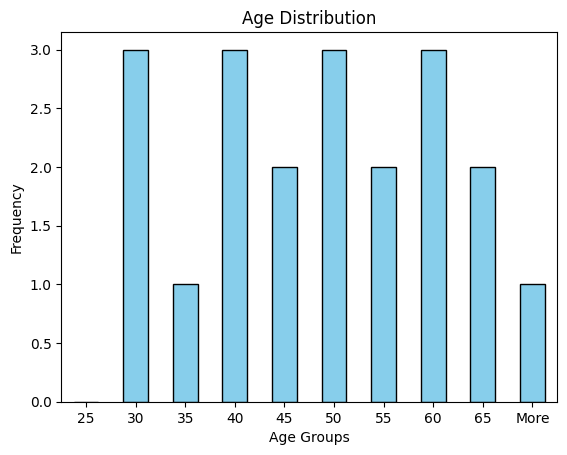

In [16]:
import matplotlib.pyplot as plt
# Create a histogram based on the age distribution
age_distribution.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Age Distribution')
plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

# Show the plot
plt.show()

Frequency Distribution Table for Years Employed:
Years Employed Group
0      10
5       3
10      2
15      3
20      1
25      1
30+     0
Name: count, dtype: int64


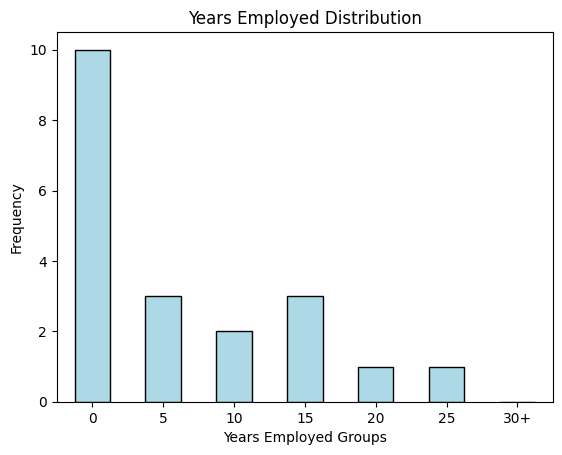

In [17]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt

# Data in string format
data_string = """
Age	Gender	Education	Marital Status	Years Employed	Satisfaction	Premium/Deductible
57	F	College graduate	Married	4	5	N
62	F	College graduate	Divorced	9	3	N
56	M	Graduate degree	Married	4	4	Y
31	M	Graduate degree	Married	1	5	N
49	F	Graduate degree	Married	2	5	N
28	F	Some college	Married	3	4	Y
50	F	Graduate degree	Married	10	5	N
36	F	Some college	Divorced	4	4	N
27	M	Some college	Married	2	3	N
61	M	Graduate degree	Widowed	26	3	N
65	F	Some college	Married	9	4	N
44	M	College graduate	Married	2	3	N
43	F	College graduate	Married	5	3	Y
52	F	College graduate	Married	18	2	N
38	M	Some college	Married	3	2	N
46	F	College graduate	Divorced	20	4	N
36	M	Some college	Divorced	15	4	Y
29	M	Graduate degree	Single	10	5	N
45	M	College graduate	Married	15	3	Y
55	F	Some college	Divorced	2	1	N
"""

# Convert the data into a pandas DataFrame
data = StringIO(data_string)
df = pd.read_csv(data, sep="\t")

# Define the bin edges for the Years Employed groups to match the correct intervals
bins = [0, 5, 10, 15, 20, 25, 30, float('inf')]

# Define the bin labels to match the intervals (one less than the number of bin edges)
labels = ['0', '5', '10', '15', '20', '25', '30+']

# Create a frequency distribution table for Years Employed
df['Years Employed Group'] = pd.cut(df['Years Employed'], bins=bins, labels=labels, right=False, include_lowest=True)

# Count the frequency of each bin
years_employed_distribution = df['Years Employed Group'].value_counts().sort_index()

# Display the frequency distribution table
print("Frequency Distribution Table for Years Employed:")
print(years_employed_distribution)

# Plot the frequency distribution as a bar chart
years_employed_distribution.plot(kind='bar', color='lightblue', edgecolor='black')

# Customize the plot
plt.title('Years Employed Distribution')
plt.xlabel('Years Employed Groups')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

# Show the plot
plt.show()


Frequency Distribution Table for Satisfaction:
Satisfaction Group
1    1
2    2
3    6
4    6
5    5
Name: count, dtype: int64


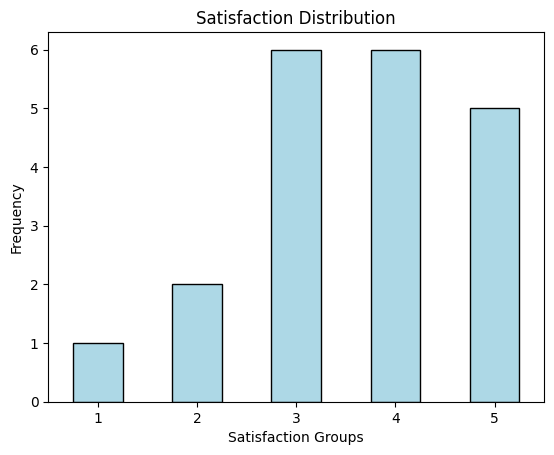

In [18]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt

# Data in string format
data_string = """Age	Gender	Education	Marital Status	Years Employed	Satisfaction	Premium/Deductible
57	F	College graduate	Married	4	5	N
62	F	College graduate	Divorced	9	3	N
56	M	Graduate degree	Married	4	4	Y
31	M	Graduate degree	Married	1	5	N
49	F	Graduate degree	Married	2	5	N
28	F	Some college	Married	3	4	Y
50	F	Graduate degree	Married	10	5	N
36	F	Some college	Divorced	4	4	N
27	M	Some college	Married	2	3	N
61	M	Graduate degree	Widowed	26	3	N
65	F	Some college	Married	9	4	N
44	M	College graduate	Married	2	3	N
43	F	College graduate	Married	5	3	Y
52	F	College graduate	Married	18	2	N
38	M	Some college	Married	3	2	N
46	F	College graduate	Divorced	20	4	N
36	M	Some college	Divorced	15	4	Y
29	M	Graduate degree	Single	10	5	N
45	M	College graduate	Married	15	3	Y
55	F	Some college	Divorced	2	1	N
"""

# Convert the data into a pandas DataFrame
data = StringIO(data_string)
df = pd.read_csv(data, sep="\t")

# Define the bin edges for the Satisfaction groups (1 through 5)
bins = [1, 2, 3, 4, 5, float('inf')]

# Define the bin labels
labels = ['1', '2', '3', '4', '5']

# Create a frequency distribution table for Satisfaction
df['Satisfaction Group'] = pd.cut(df['Satisfaction'], bins=bins, labels=labels, right=False, include_lowest=True)

# Count the frequency of each bin
satisfaction_distribution = df['Satisfaction Group'].value_counts().sort_index()

# Display the frequency distribution table
print("Frequency Distribution Table for Satisfaction:")
print(satisfaction_distribution)

# Plot the frequency distribution as a bar chart
satisfaction_distribution.plot(kind='bar', color='lightblue', edgecolor='black')

# Customize the plot
plt.title('Satisfaction Distribution')
plt.xlabel('Satisfaction Groups')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

# Show the plot
plt.show()


In [19]:
import pandas as pd
import numpy as np
from io import StringIO

# Data in string format
data_string = """Age	Gender	Education	Marital Status	Years Employed	Satisfaction	Premium/Deductible
57	F	College graduate	Married	4	5	N
62	F	College graduate	Divorced	9	3	N
56	M	Graduate degree	Married	4	4	Y
31	M	Graduate degree	Married	1	5	N
49	F	Graduate degree	Married	2	5	N
28	F	Some college	Married	3	4	Y
50	F	Graduate degree	Married	10	5	N
36	F	Some college	Divorced	4	4	N
27	M	Some college	Married	2	3	N
61	M	Graduate degree	Widowed	26	3	N
65	F	Some college	Married	9	4	N
44	M	College graduate	Married	2	3	N
43	F	College graduate	Married	5	3	Y
52	F	College graduate	Married	18	2	N
38	M	Some college	Married	3	2	N
46	F	College graduate	Divorced	20	4	N
36	M	Some college	Divorced	15	4	Y
29	M	Graduate degree	Single	10	5	N
45	M	College graduate	Married	15	3	Y
55	F	Some college	Divorced	2	1	N
"""

# Convert the data into a pandas DataFrame
data = StringIO(data_string)
df = pd.read_csv(data, sep="\t")

# Calculate descriptive statistics for the 'Age' column
mean_age = df['Age'].mean()
median_age = df['Age'].median()
std_dev_age = df['Age'].std(ddof=1)  # Sample standard deviation
variance_age = df['Age'].var(ddof=1)  # Sample variance
min_age = df['Age'].min()
max_age = df['Age'].max()
range_age = max_age - min_age
sum_age = df['Age'].sum()
count_age = df['Age'].count()

# Display the results
print(f"Mean: {mean_age:.2f}")
print(f"Median: {median_age:.2f}")
print(f"Standard Deviation: {std_dev_age:.2f}")
print(f"Sample Variance: {variance_age:.2f}")
print(f"Range: {range_age:.2f}")
print(f"Minimum: {min_age:.2f}")
print(f"Maximum: {max_age:.2f}")
print(f"Sum: {sum_age:.2f}")
print(f"Count: {count_age:.2f}")


Mean: 45.50
Median: 45.50
Standard Deviation: 11.87
Sample Variance: 140.89
Range: 38.00
Minimum: 27.00
Maximum: 65.00
Sum: 910.00
Count: 20.00


## QUESTION 19

In [38]:
import pandas as pd

# Create the data as a list of dictionaries
# Initial string data to convert into the desired format
data_str = """
Loan Purpose	Checking	Savings
New Car	$0	$490
Business	$444	$921
Furniture	$0	$8,357
Repairs	$216	$262
Repairs	$0	$807
New Car	$0	$862
Other	$218	$0
Furniture	$0	$836
Used Car	$0	$1,519
New Car	$0	$531
New Car	$0	$3,305
Small Appliance	$6,851	$901
New Car	$305	$4,553
New Car	$0	$207
Furniture	$161	$524
Education	$713	$784
Small Appliance	$0	$3,870
Business	$0	$3,285
Used Car	$2,472	$0
Business	$870	$917
New Car	$0	$457
Used Car	$0	$999
New Car	$382	$883
Furniture	$0	$485
Small Appliance	$0	$12,242
Education	$0	$238
Small Appliance	$911	$823
New Car	$193	$2,684
Business	$522	$194
Furniture	$617	$411
Retraining	$0	$603
New Car	$122	$460
Small Appliance	$0	$552
Used Car	$0	$309
Business	$859	$3,305
Small Appliance	$242	$0
Small Appliance	$0	$490
Other	$0	$0
Used Car	$1,336	$0
Small Appliance	$0	$337
New Car	$0	$229
Education	$0	$127
Furniture	$352	$7,525
New Car	$0	$857
Furniture	$0	$0
Business	$9,783	$885
Furniture	$468	$14,186
Other	$852	$3,613
Furniture	$0	$204
New Car	$0	$660
"""

# Adjusting the code to properly remove the $ symbol before converting to integers

# Process the string into the required format

# The first line is an empty line and the second is the header, we should skip these
lines = [line for line in data_str.splitlines() if line.strip() != '' and not line.startswith("Loan Purpose")]

# Now proceed with processing the remaining lines
data = []

for line in lines:
    parts = line.split('\t')
    
    # Ensure there are exactly 3 parts (Loan Purpose, Checking, Savings)
    if len(parts) == 3:
        loan_purpose = parts[0].strip()
        # Remove any commas and dollar signs, then convert to integers
        checking = int(parts[1].replace(',', '').replace('$', '').strip())
        savings = int(parts[2].replace(',', '').replace('$', '').strip())
        data.append({"Loan Purpose": loan_purpose, "Checking": checking, "Savings": savings})

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate the combined amounts in Checking and Savings
df['Combined'] = df['Checking'] + df['Savings']

# Calculate the quartiles
Q1 = df['Combined'].quantile(0.25)
Q2 = df['Combined'].quantile(0.50)  # This is the median
Q3 = df['Combined'].quantile(0.75)

quartiles = {"First Quartile (Q1)": Q1, "Second Quartile (Q2)": Q2, "Third Quartile (Q3)": Q3}

quartiles



{'First Quartile (Q1)': np.float64(479.75),
 'Second Quartile (Q2)': np.float64(846.5),
 'Third Quartile (Q3)': np.float64(2775.75)}